In [1]:
# import relevant modules 
import os
import sys
import pickle
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

# locate directory containing scripts 
current_directory = os.getcwd() 
parent_directory = os.path.dirname(current_directory)
src_directory = parent_directory + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain
import generate_VTA_list
import fidelity_line_graphs

## reload custom modules (used when modifying scripts)
reload(spin_chain)
reload(generate_VTA_list)
reload(fidelity_line_graphs)

# import functions from modules
from spin_chain import symmetry_eigvecs, properties
from generate_VTA_list import SU2_automated
from fidelity_line_graphs import generate_initial_states, \
                               plot_exact_fidelity, VTA_fidelity

$\Large \text{Collect Spin Chain Parameters}$

In [2]:
# specify parameters for spin chain (number of sites, coupling constants, 
# periodic or non-periodic boundary conditions,  and tolerance 
# with which to determine ground state energy
N_qubits = 6
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9

# collect properties of spin chain
H6, H6_list, eigenstates, eigenvalues, E0, ρ_ground_state = \
    properties(N_qubits, Jx, Jy, Jz, periodic_bc, tolerance)

# $\text{VTA}_{\text{exact}}(\alpha, \lambda, E_{\text{s}})$

$\Large \text{Measure M = 6 cavities}$

In [3]:
# define parameters for simulations
N_cavities = 6
N_qubits = 6
α_start = 0
α_end = 1
α_steps = 101
m_start = 6
m_end = 6
Es = E0
num_states = 4
tolerance = 1e-9
cutoff = 'N/A'
savefile = True

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

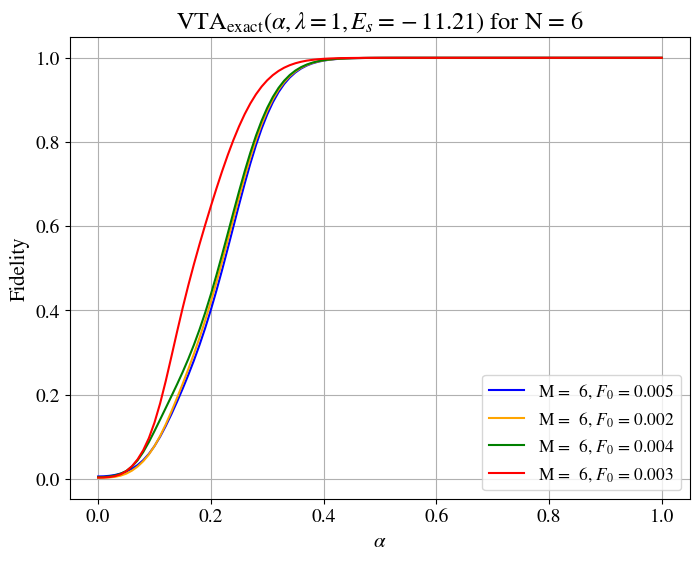

In [5]:
# plot simulation results
VTA_exact_fidelity_array = plot_exact_fidelity(
                           N_cavities, α_start, α_end, α_steps, Es, \
                           m_start, m_end, N_qubits, Jx, Jy, Jz, \
                           periodic_bc, tolerance, ψ0_list, savefile, parent_directory)

$\Large \text{Measure } M = \{1, 2, 3, 4, 5, 6\} \text{ cavities}$

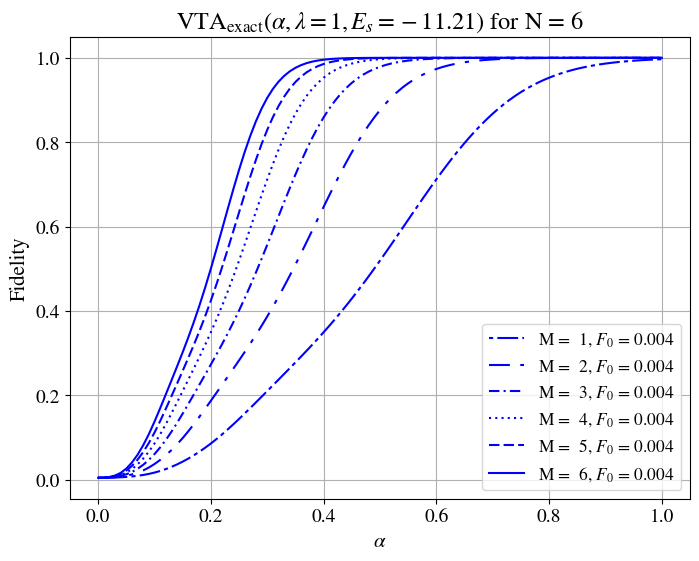

In [7]:
# adjust number of cavities to project and number of trial states
m_start = 1
m_end = 6
num_states = 1

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

# plot simulation results
VTA_exact_fidelity_array = plot_exact_fidelity(
                           N_cavities, α_start, α_end, α_steps, Es, \
                           m_start, m_end, N_qubits, Jx, Jy, Jz, \
                           periodic_bc, tolerance, ψ0_list, savefile, parent_directory)

# $\text{VTA}(\alpha, \lambda, E_{\text{s}})$

In [8]:
# define parameters for simulations
N_cavities = 6
N_qubits = 6
α_start = 0
α_end = 1
α_steps = 101
m_start = 6
m_stop = 6
Es = E0
r = 1
num_states = 4
asymptotes = False
tolerance = 1e-9
cutoff = 'N/A'
savefile = True
return_fidelity_array = True

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

# note this function takes 20-25 minutes to generate 
# the VTA_list for 100 distinct values of α
VTA_list = SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, Es, savefile, parent_directory)

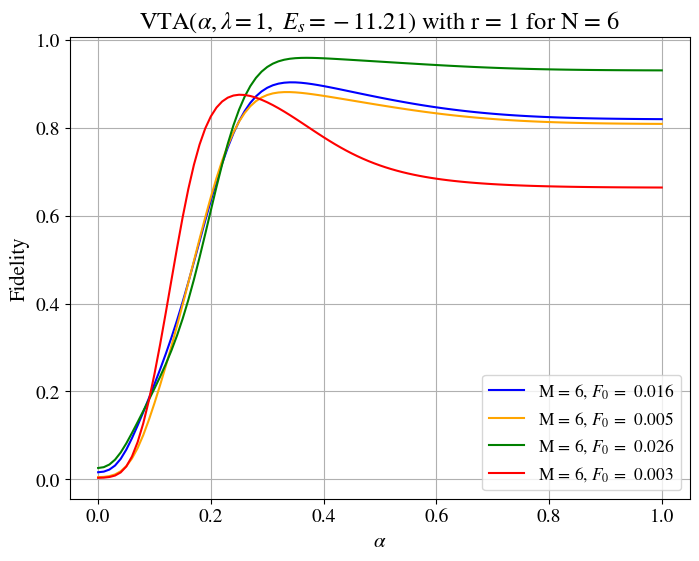

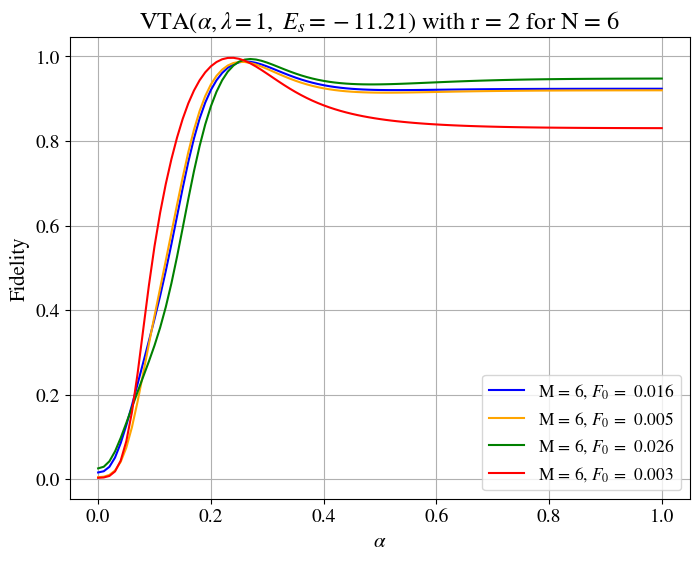

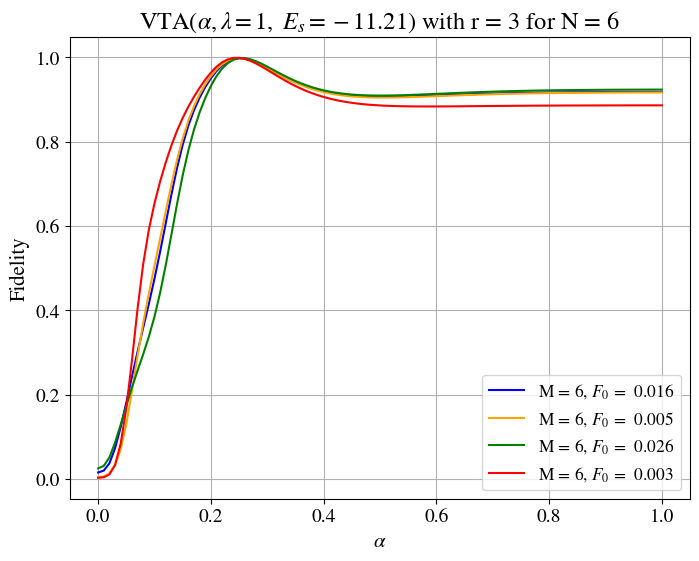

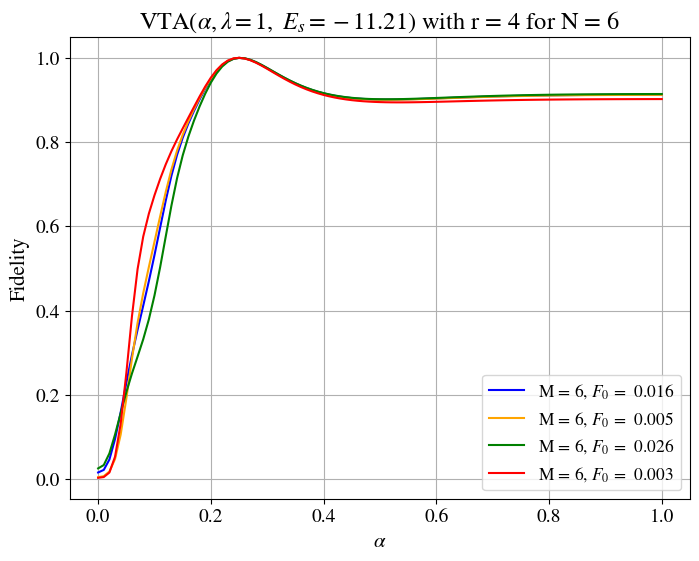

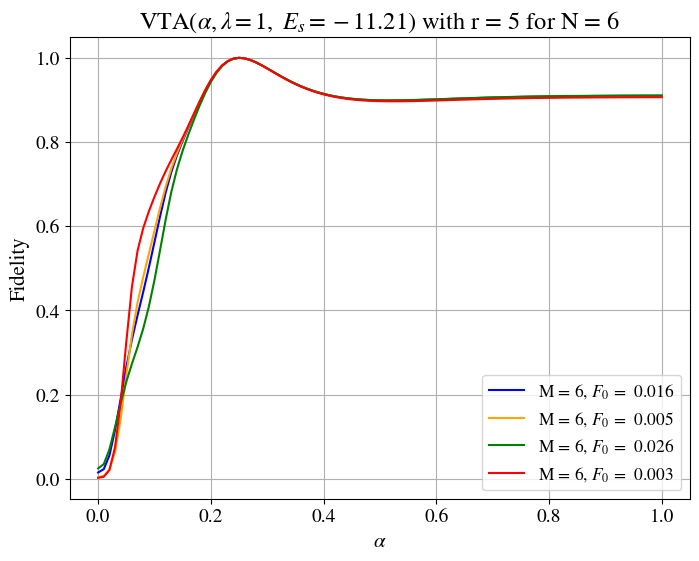

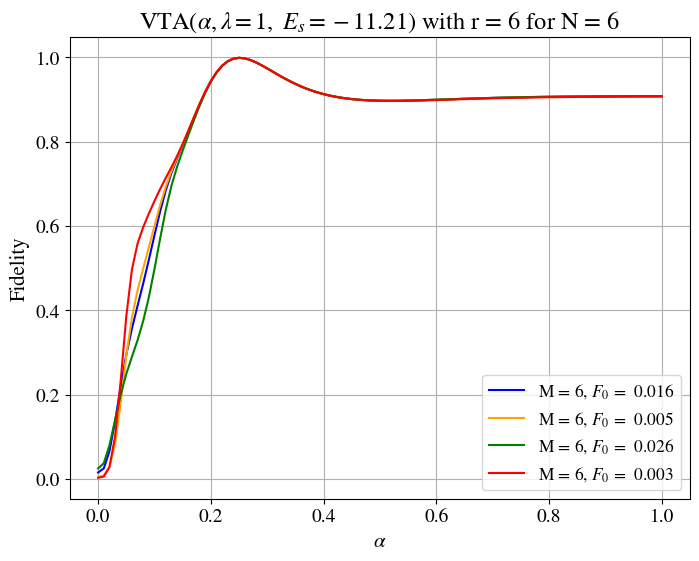

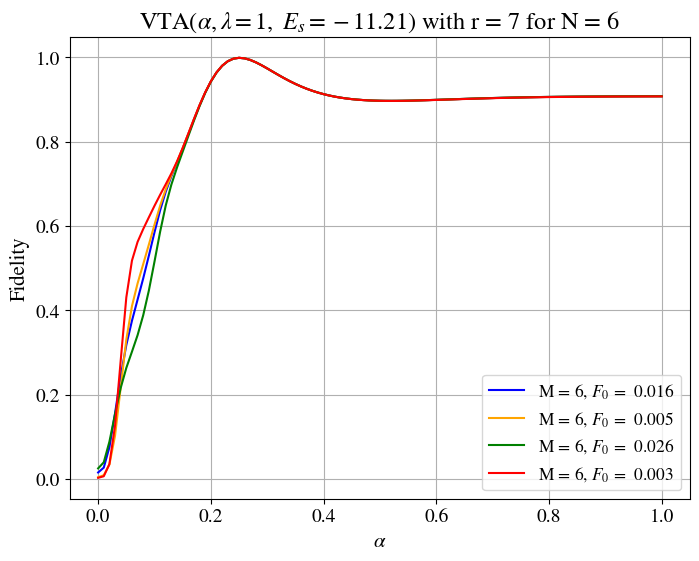

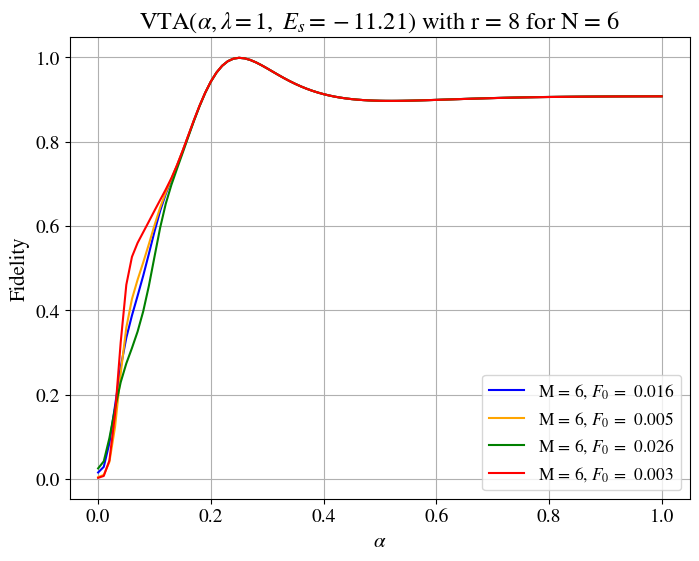

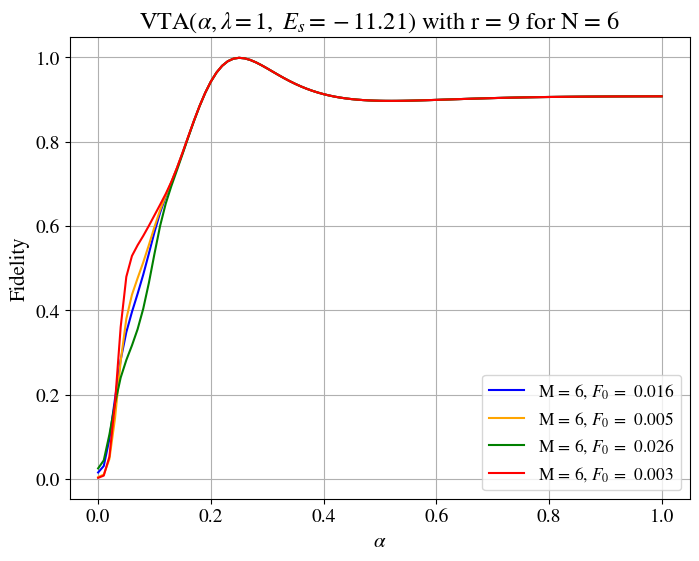

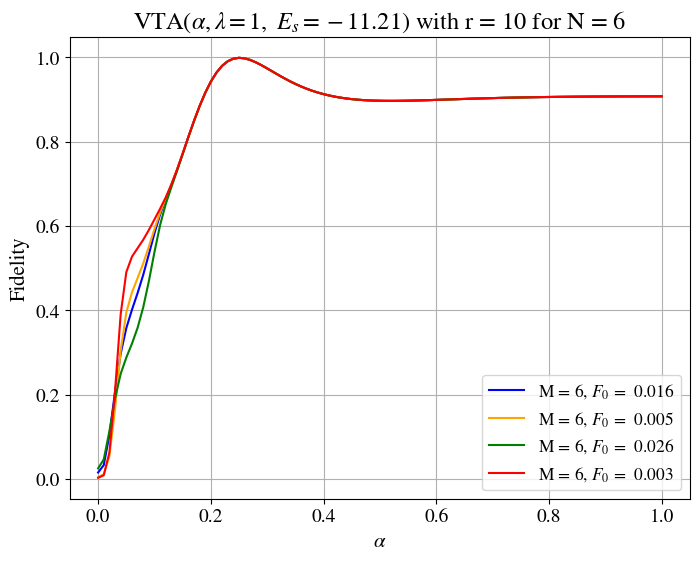

In [9]:
for r in range(1, 10+1):

    VTA_fidelity_array = VTA_fidelity(
                         N_qubits, ψ0_list, VTA_list, ρ_ground_state, α_start, α_end, α_steps, 
                         Jx, Jy, Jz, Es, r, m_start, m_stop, asymptotes, savefile, \
                         parent_directory, return_fidelity_array = return_fidelity_array)

In [11]:
α_array = np.linspace(α_start, α_end, α_steps)
for i in range(num_states): 
    arg = np.argmax(VTA_fidelity_array[i])
    α_optimal = α_array[arg]
    print(f'Maximum fidelity for state {i} when α = {α_optimal:.4f}')

Maximum fidelity for state 0 when α = 0.2500
Maximum fidelity for state 1 when α = 0.2500
Maximum fidelity for state 2 when α = 0.2500
Maximum fidelity for state 3 when α = 0.2500
